In [2]:
from keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

ModuleNotFoundError: No module named 'tensorflow'

In [17]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [18]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [19]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(
    optimizer=optimizers.rmsprop_v2.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.accuracy]
)

C:\Users\User\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/4
30/30 [==============================] - 1s 23ms/step - loss: 0.5263 - accuracy: 0.0000e+00 - val_loss: 0.3992 - val_accuracy: 0.0000e+00
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.3170 - accuracy: 0.0000e+00 - val_loss: 0.3128 - val_accuracy: 0.0000e+00
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 0.2317 - accuracy: 0.0000e+00 - val_loss: 0.2850 - val_accuracy: 1.0000e-04
Epoch 4/4
30/30 [==============================] - 0s 10ms/step - loss: 0.1835 - accuracy: 0.0000e+00 - val_loss: 0.2745 - val_accuracy: 2.0000e-04


In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


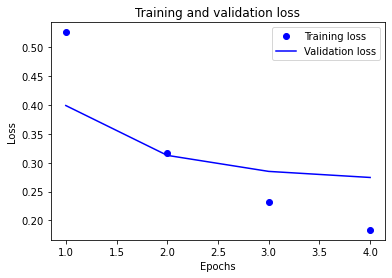

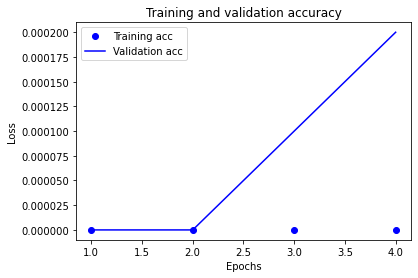

In [23]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [24]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 1s 800us/step - loss: 0.2897 - accuracy: 0.0000e+00
[0.2896924316883087, 0.0]
